#Classification Task

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import datetime
from tensorflow.keras.callbacks import TensorBoard

In [2]:
# Initialize Weights & Biases
# Initialize TensorBoard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


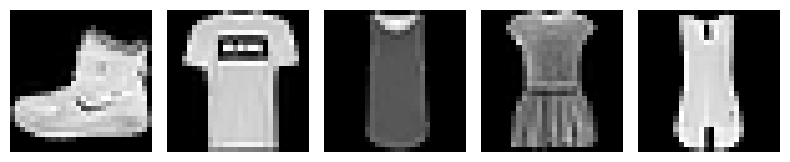

In [3]:
# Load dataset (Fashion MNIST)
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

# Normalize pixel values between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


# Display a few sample images
plt.figure(figsize=(8,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [4]:
# Define model
fashion_model = tf.keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

# Compile model
fashion_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:

# Train model with Weights & Biases logging
history = fashion_model.fit(train_images, train_labels,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[tensorboard_callback])

# Evaluate model
test_loss, test_accuracy = fashion_model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_accuracy:.4f}")


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7508 - loss: 0.7155 - val_accuracy: 0.8497 - val_loss: 0.4124
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8481 - loss: 0.4204 - val_accuracy: 0.8566 - val_loss: 0.3919
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8605 - loss: 0.3815 - val_accuracy: 0.8546 - val_loss: 0.3845
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8680 - loss: 0.3572 - val_accuracy: 0.8753 - val_loss: 0.3464
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8770 - loss: 0.3318 - val_accuracy: 0.8780 - val_loss: 0.3384
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8830 - loss: 0.3161 - val_accuracy: 0.8834 - val_loss: 0.3333
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8864 - loss: 0.3108 - val_accuracy: 0.8817 - val_loss: 0.3277
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8875 - loss: 0.2994 -

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


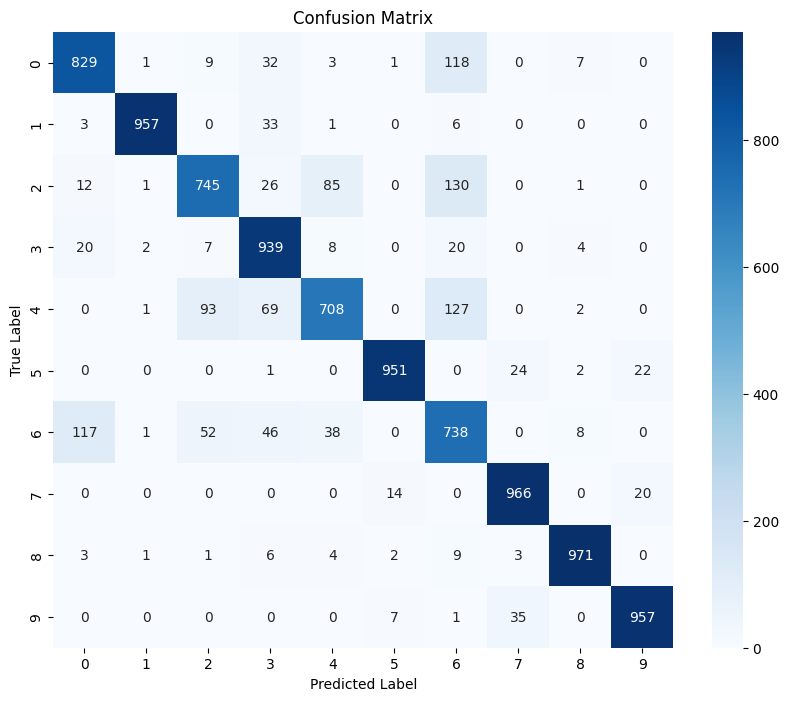

In [7]:
# Predictions
y_pred = fashion_model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute and log confusion matrix
cm = confusion_matrix(test_labels, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [9]:
# Classification report
print("\nClassification Report:")
print(classification_report(test_labels, y_pred_classes))


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1000
           1       0.99      0.96      0.97      1000
           2       0.82      0.74      0.78      1000
           3       0.82      0.94      0.87      1000
           4       0.84      0.71      0.77      1000
           5       0.98      0.95      0.96      1000
           6       0.64      0.74      0.69      1000
           7       0.94      0.97      0.95      1000
           8       0.98      0.97      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



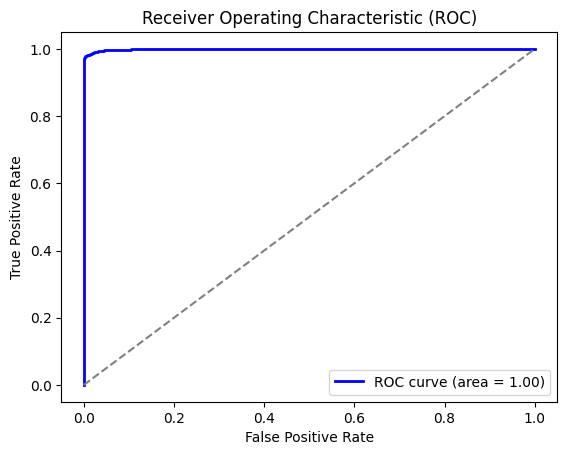

In [10]:
# ROC Curve
fpr, tpr, _ = roc_curve(test_labels, y_pred[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

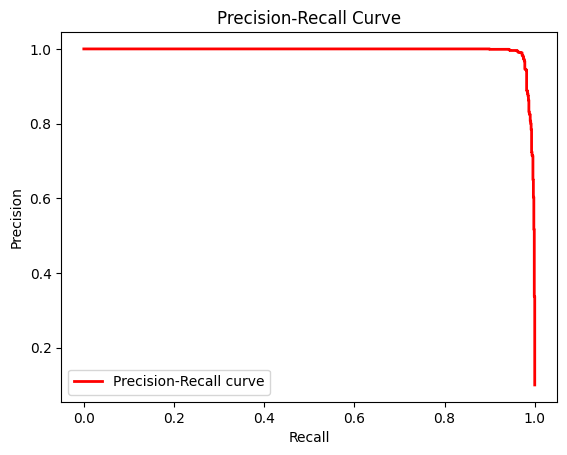

In [11]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(test_labels, y_pred[:, 1], pos_label=1)
plt.figure()
plt.plot(recall, precision, color='red', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

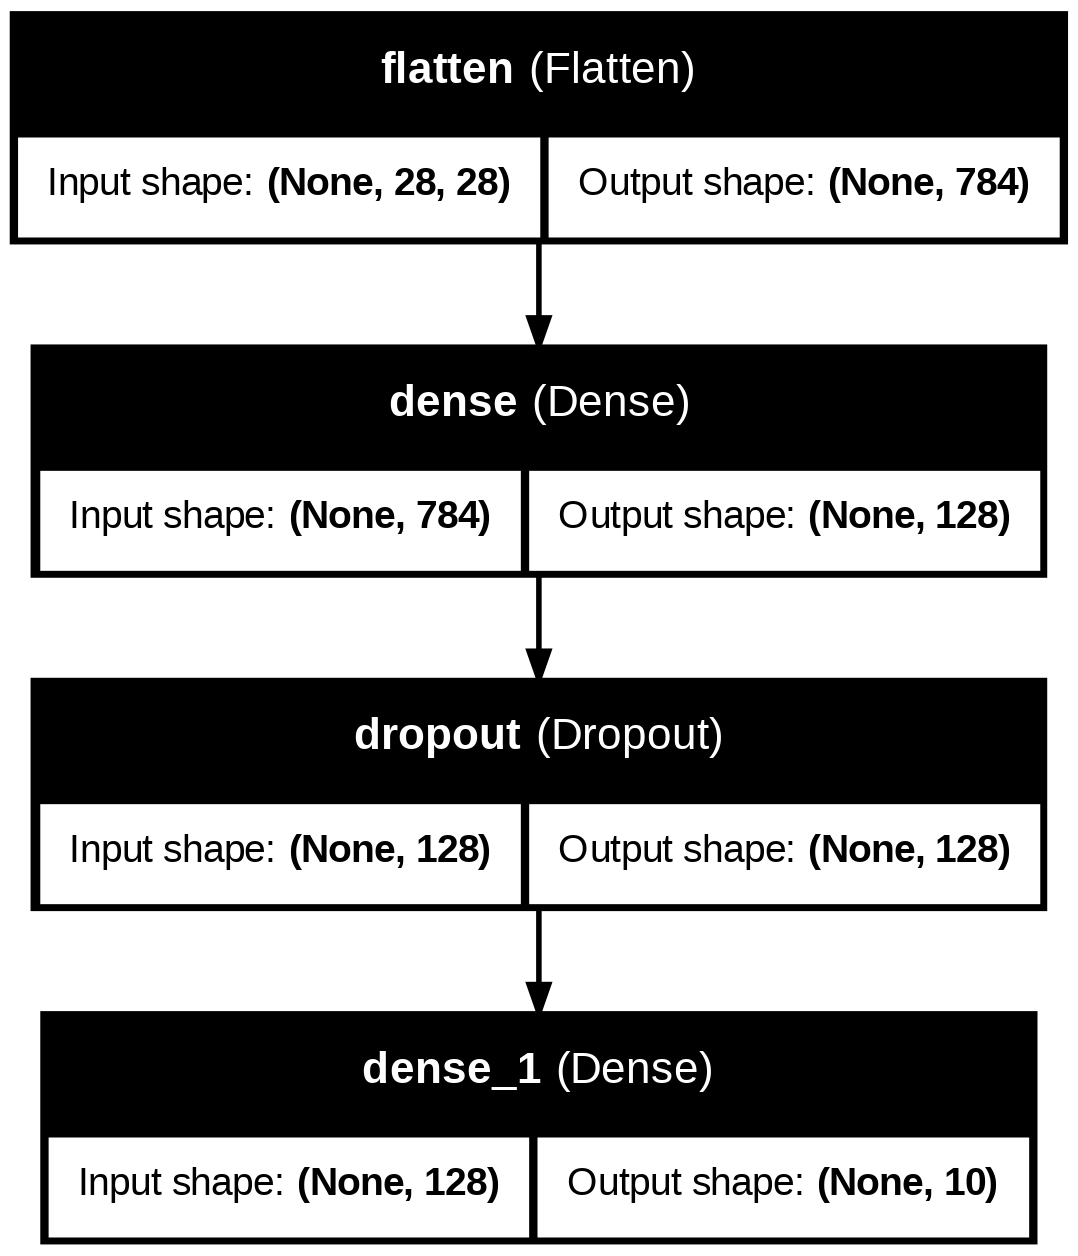

In [14]:
# Log model architecture
from tensorflow.keras.utils import plot_model

# Save and display model architecture
plot_model(fashion_model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

In [15]:
# Print model summary
print('Model Summary:')
fashion_model.summary()

Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)